In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("BRCA_cleaned.csv")
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Dead


In [8]:
df['Gender'].value_counts()

Gender
FEMALE    330
MALE        4
Name: count, dtype: int64

In [4]:
df.isnull().sum()

Age                7
Gender             7
Protein1           7
Protein2           7
Protein3           7
Protein4           7
Tumour_Stage       7
Histology          7
ER status          7
PR status          7
HER2 status        7
Patient_Status    20
dtype: int64

In [5]:
df = df.dropna(subset=['Patient_Status'])  # drop rows missing target

df = df.copy()  # ensure df is not a view

num_cols = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']
df.loc[:, num_cols] = df.loc[:, num_cols].fillna(df.loc[:, num_cols].median())

cat_cols = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status']
df.loc[:, cat_cols] = df.loc[:, cat_cols].fillna(df.loc[:, cat_cols].mode().iloc[0])


In [6]:
print(df.isnull().sum())


Age               0
Gender            0
Protein1          0
Protein2          0
Protein3          0
Protein4          0
Tumour_Stage      0
Histology         0
ER status         0
PR status         0
HER2 status       0
Patient_Status    0
dtype: int64


In [7]:
df.shape

(321, 12)

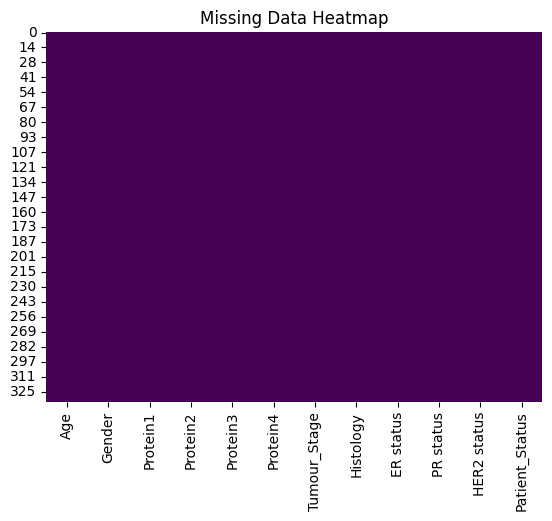

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [9]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Dead


In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load your data
df = pd.read_csv('BRCA_cleaned.csv')

# Drop rows with missing target
df = df.dropna(subset=['Patient_Status'])

# Fill missing numeric and categorical columns (example here)
num_cols = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']
cat_cols = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status']

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Convert target to binary
df['Patient_Status'] = df['Patient_Status'].map({'Alive':1, 'Dead':0})

# Features and target
X = df[num_cols + cat_cols]
y = df['Patient_Status']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for categorical features: OneHotEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ], remainder='passthrough'  # numeric columns pass through unchanged
)

# Build the pipeline with preprocessor + classifier
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Train the pipeline
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Example of predicting from new input:

def predict_from_user_input(model):
    # Get user input
    age = int(input("Enter age: "))
    gender = input("Enter gender (MALE/FEMALE): ").strip().upper()
    prot1 = float(input("Enter Protein1 value: "))
    prot2 = float(input("Enter Protein2 value: "))
    prot3 = float(input("Enter Protein3 value: "))
    prot4 = float(input("Enter Protein4 value: "))
    stage = input("Enter Tumour Stage (I/II/III): ").strip().upper()
    histology = input("Enter Histology: ").strip()
    er = input("Enter ER status (Positive/Negative): ").strip().capitalize()
    pr = input("Enter PR status (Positive/Negative): ").strip().capitalize()
    her2 = input("Enter HER2 status (Positive/Negative): ").strip().capitalize()

    # Create input DataFrame
    input_df = pd.DataFrame([{
        'Age': age,
        'Gender': gender,
        'Protein1': prot1,
        'Protein2': prot2,
        'Protein3': prot3,
        'Protein4': prot4,
        'Tumour_Stage': stage,
        'Histology': histology,
        'ER status': er,
        'PR status': pr,
        'HER2 status': her2
    }])

    # Prediction
    pred = model.predict(input_df)[0]
    prob = model.predict_proba(input_df)[0][1]

    status = "Alive" if pred == 1 else "Dead"

    print("\nPrediction Result:")
    print(f"Patient Status: {status}")
    print(f"Probability of being Alive: {round(prob * 100, 2)}%")

predict_from_user_input(model)



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.81      0.94      0.87        53

    accuracy                           0.77        65
   macro avg       0.40      0.47      0.43        65
weighted avg       0.66      0.77      0.71        65



In [ ]:
import joblib

joblib.dump(model, 'BRDA_model.pkl')


In [ ]:
joblib.dump(preprocessor, 'breast_scaler.joblib')